<a href="https://colab.research.google.com/github/Martincg16/CoudComputingBasics/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [217]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import from google drive
from google.colab import drive

### Understanding the structure of the data

In [188]:
# read the data
drive.mount("/content/drive")

orders = pd.read_csv('/content/drive/MyDrive/MIT Data Science/ADSP/Projects/foodhub_order.csv')
# returns the first 5 rows
orders.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [189]:
orders.shape #return the shape of the DataFrame

(1898, 9)

#### Observations:

- The data contains 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [190]:
orders.info() #Brings information about the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The list contains the following datatype per column:
- order_id: integer
- customer_id: integer
- restaurant_name: object
- cuisine_type: object
- cost_of_the_order: float
- day_of_the_week: object
- rating: object
- food_preparation_time: integer
- delivery_time: integer

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [191]:
orders.describe(include="all").T #detailed description of the data, Transposed to make it easier to read

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

There are no missing values on the data, each column has 1989 values. We know thi because each column contains 1898 entries, which is the total amount of rows of the Data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [192]:
min = orders['food_preparation_time'].min() #minimum of the column food preparation time
max = orders['food_preparation_time'].max() #maximum of the column food preparation time
avg = orders['food_preparation_time'].mean() #average of the column food preparation time

print( 'min:', min,'\naverage:' ,avg,'\nmax:',max)

min: 20 
average: 27.371970495258168 
max: 35


#### Observations:

The minimum, average, and maximum time it takes for food to be prepared once an order is places is 20 minutes, 27.3719 minutes, and 35 minutes respectively


### **Question 5:** How many orders are not rated? [1 mark]

In [193]:
orders['rating'].unique() #find the unique values available in 'ranking'

array(['Not given', '5', '3', '4'], dtype=object)

In [194]:
unranked_orders = orders[orders['rating'] == 'Not given' ] #selec all orders where 'rating' is 'Not given'
unranked_orders['rating'].value_counts() #count all items in the column 'rating' -> equivalent to counting the rows in the new DataFrame

Not given    736
Name: rating, dtype: int64

#### Observations:

There are 736 orders that contain a Ranking of "Not given"

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: ylabel='cost_of_the_order'>

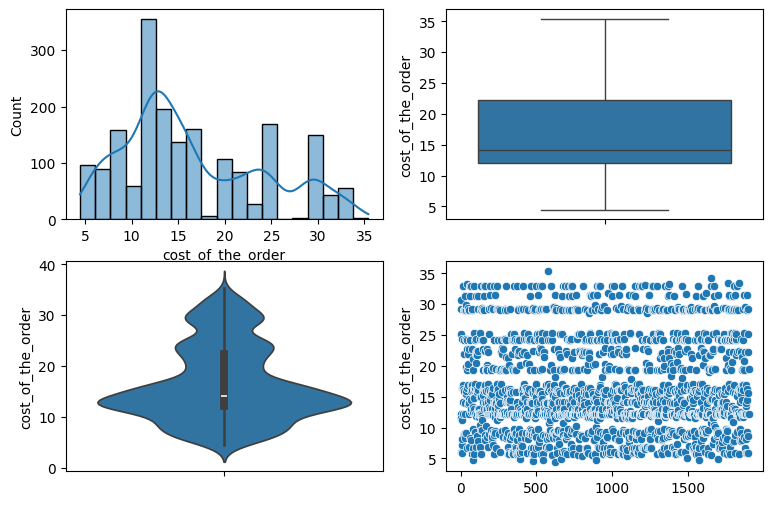

In [195]:
fig, axes = plt.subplots(2, 2, figsize=(9, 6))
sns.histplot(data=orders['cost_of_the_order'], kde=True, ax=axes[0,0])  # Histogram with KDE
sns.boxplot(data=orders['cost_of_the_order'], ax=axes[0, 1])  # Box plot
sns.violinplot(data=orders['cost_of_the_order'], ax=axes[1, 0])  # Violin plot
sns.scatterplot(data=orders['cost_of_the_order'], ax=axes[1, 1])  # Empirical Cumulative Distribution Function (ECDF) plot


Regarding the 'Cost of the order' we can conclude the following after analyzing several charts:
- Most of orders cost from 10 to 15 dollars
- 50% of the orders cost between (roughly) 12.5 and 22.5 dollars
- The minimum order is roughly 5 dollars, and the maximum order is about 35 dollars

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

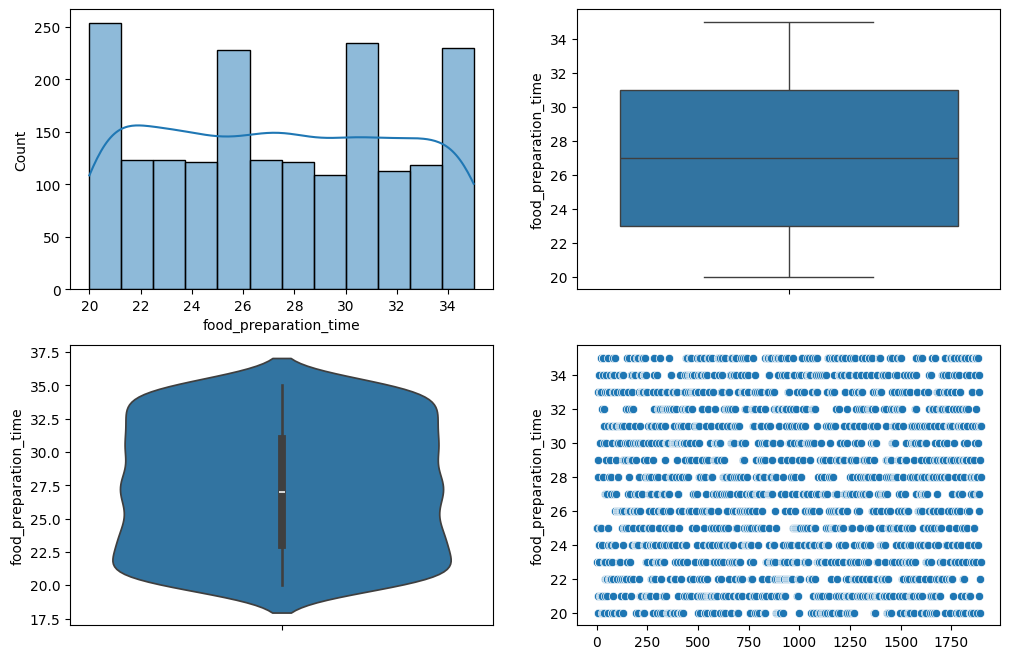

In [196]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=orders['food_preparation_time'], kde=True, ax=axes[0,0])  # Histogram with KDE
sns.boxplot(data=orders['food_preparation_time'], ax=axes[0, 1])  # Box plot
sns.violinplot(data=orders['food_preparation_time'], ax=axes[1, 0])  # Violin plot
sns.scatterplot(data=orders['food_preparation_time'], ax=axes[1, 1])  # Empirical Cumulative Distribution Function (ECDF) plot

orders['food_preparation_time'].describe()

Regarding the Food preparation we can conclude the following after analyzing several charts:

- The distribution is fairly uniform, without outliers
- The min, Q1, mean, Q3, and max are roughly 4m away from each other, with a minimum of 20 and maximum of 35 minutes

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

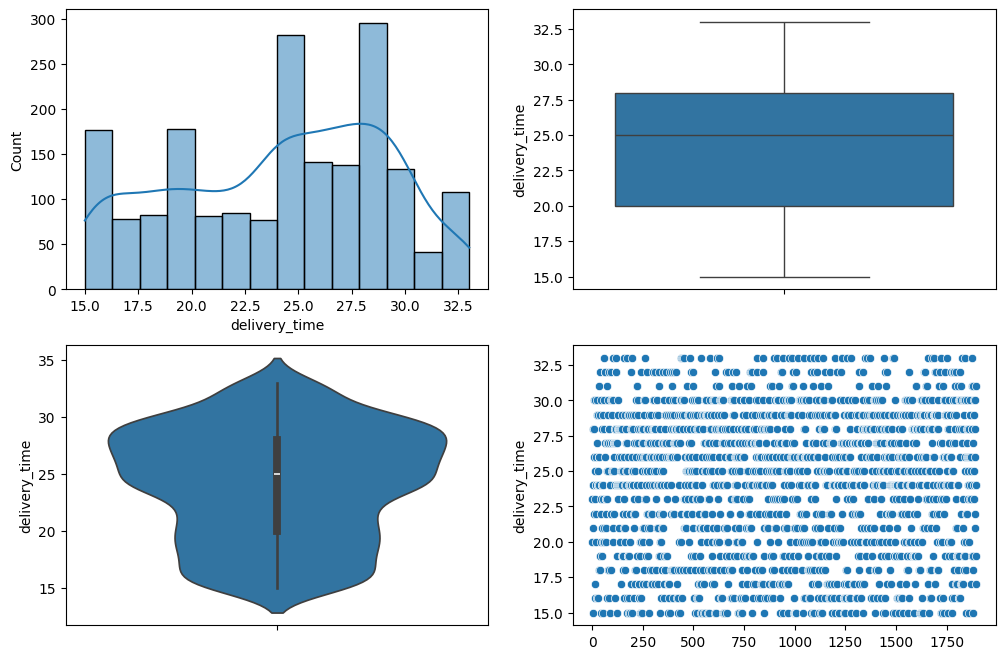

In [197]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=orders['delivery_time'], kde=True, ax=axes[0,0])  # Histogram with KDE
sns.boxplot(data=orders['delivery_time'], ax=axes[0, 1])  # Box plot
sns.violinplot(data=orders['delivery_time'], ax=axes[1, 0])  # Violin plot
sns.scatterplot(data=orders['delivery_time'], ax=axes[1, 1])  # Empirical Cumulative Distribution Function (ECDF) plot
orders['delivery_time'].describe()

Regarding the delivery time we can conclude the following after analyzing several charts:
- The distribution is skewed left, making its mean closer to the third quartile
- The mean delivery time is 24.2 minutes
- The minimum and maximum values are 15 and 33 minutes respectively

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


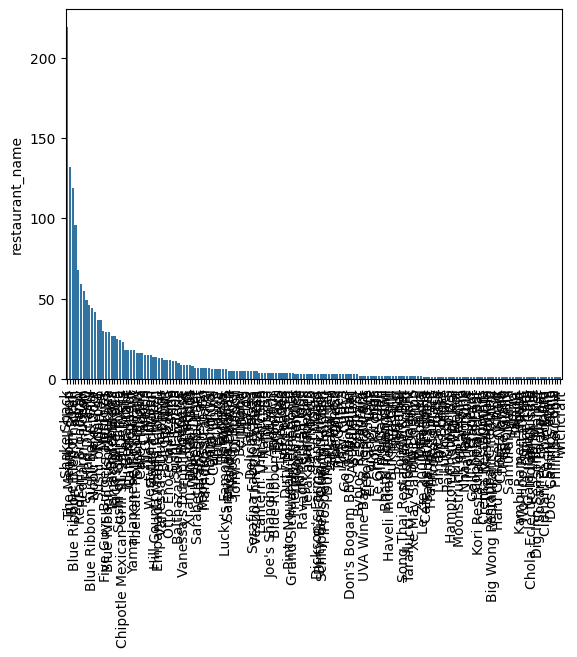

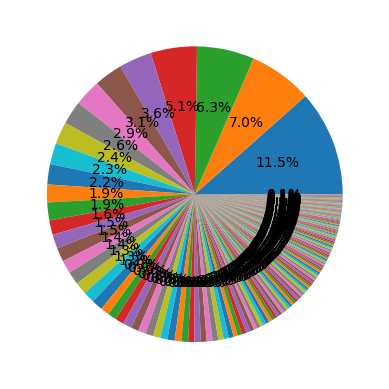

Number of restaurants: 178


In [198]:
sns.barplot(data=orders['restaurant_name'].value_counts() )  # Bar plot
plt.xticks(rotation=90)
plt.show()

plt.pie( orders['restaurant_name'].value_counts(), autopct='%1.1f%%' )
plt.show()

print('Number of restaurants:' , orders['restaurant_name'].nunique() )

Regarding the restaurants we can conclude the following after analyzing several charts:
- Over 10% of the orders come from only 1 restaurant, out of 178 restaurants
- About 25% of the orders come from only 3 restaurants, out of 178 restaurants
- The bargraph shows some kind of exponential relationship between orders and restaurants, having a high concentration of orders in just a few restaurants


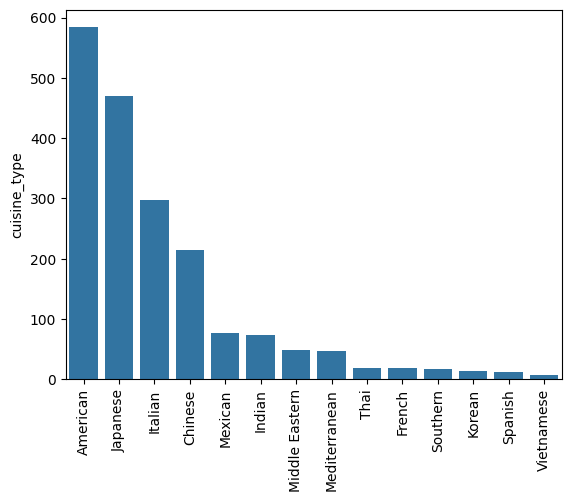

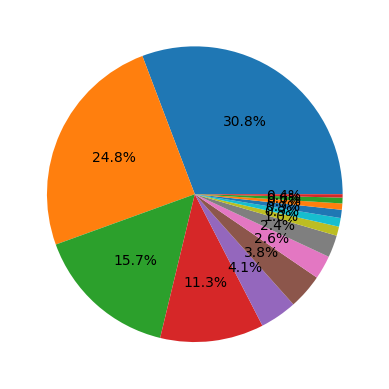

Number of cuisine typees: 14


In [199]:
sns.barplot(data=orders['cuisine_type'].value_counts() )  # Bar plot
plt.xticks(rotation=90)
plt.show()

plt.pie( orders['cuisine_type'].value_counts(), autopct='%1.1f%%' )
plt.show()

print('Number of cuisine typees:' , orders['cuisine_type'].nunique() )

Regarding the cuisine types we can conclude the following after analyzing several charts:
- 30% of the orders come from American food
- Almos 3/4 of all orders come from 3 cuisine types, out of 14
- There seems to be an exponential relationship between the number of orders and the cuisine type, where a few cuisine types take up most of the orders

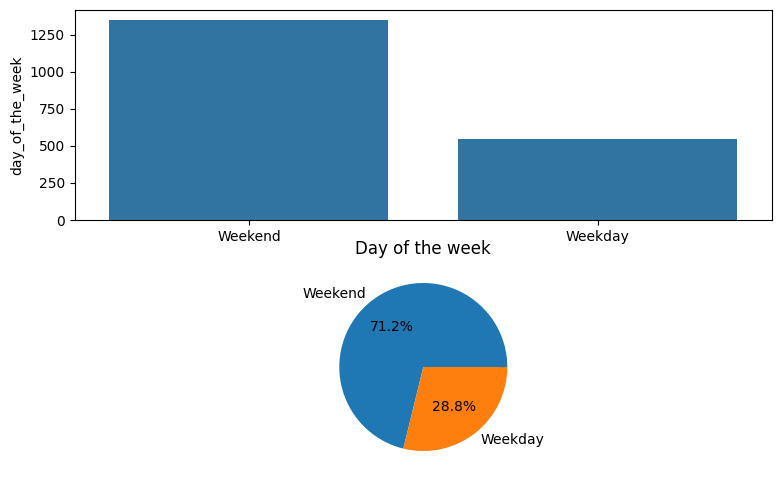

In [200]:
fig, axes = plt.subplots(2, figsize=(9, 6))
sns.barplot(data=orders['day_of_the_week'].value_counts(), ax=axes[0])  # Bar plot
plt.pie(orders['day_of_the_week'].value_counts(), labels=['Weekend','Weekday'], autopct='%1.1f%%')  # Count plot
plt.title('Day of the week')
plt.show()

Regarding the day of the week we can conclude the following after analyzing several charts:
- Most of the orders (71.2%) are done un the Weekend, being the weekend shorter than the weekdays

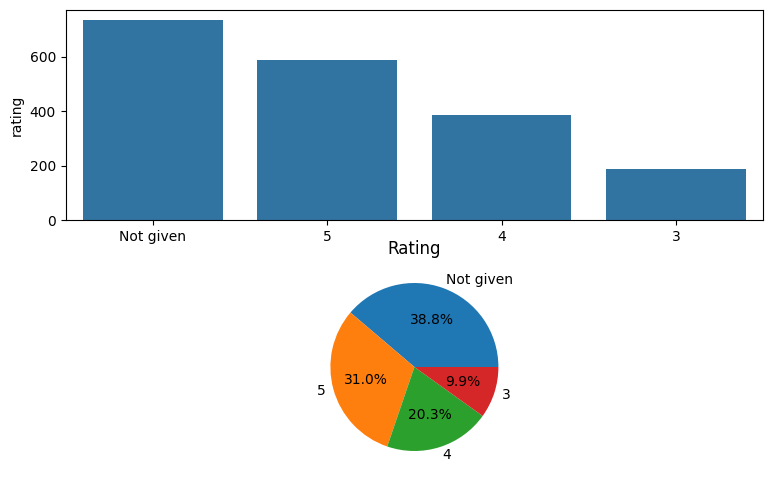

In [201]:
fig, axes = plt.subplots(2, figsize=(9, 6))
sns.barplot(data=orders['rating'].value_counts(), ax=axes[0])  # Bar plot
plt.pie(orders['rating'].value_counts(), labels=['Not given','5','4','3'], autopct='%1.1f%%')  # Count plot
plt.title('Rating')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

Regarding the ratings we can conclude the following after analyzing several charts:
- Most orders are unranked, routghly 40%
- Out of only the ranked orders, 50% have 5 stars, 33% have 4 stars, and 16% have 3 stars


In [202]:
orders['restaurant_name'].value_counts().nlargest(5) #count the values of 'restaurant names' and return the 5 largests

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurants in terms of orders received are Shake shack with 219, The Meatball Shop with 132, Blue Ribbon Sushi with 119, Blu Ribbon Fried Chicken with 96, and Parm with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [203]:
wknd_orders = orders[orders['day_of_the_week'] == "Weekend"].copy() #create a df containing only Weekend orders
wknd_orders['cuisine_type'].value_counts() #count the items in the df by cuisine type

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

We can conclude that the most popular cuisine on weekends is the American cuisine, with 415 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [204]:
(orders['cost_of_the_order'] > 20).value_counts(normalize=True) #count the values of orders costing over 20, and return the answer as a % with normalize=True

False    0.707587
True     0.292413
Name: cost_of_the_order, dtype: float64

#### Observations:

We can conclude that about 29.24% of the orders cost over 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [205]:
orders['delivery_time'].mean() #Calculate the mean delivery time from the column delivery time

24.161749209694417

#### Observations:

We can conclude that the mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [206]:
customers = orders['customer_id'].value_counts() #Count customers that have orders
print (customers[:3]) #retreive the first three users
print()
customers = orders.groupby( ['customer_id'] ).mean() #Group by number of customers
print (customers.shape) #Count number of customers
print()
unique_customers = (orders['customer_id'].value_counts() == 1).value_counts()
print ("unique customers" ,unique_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

(1200, 4)

unique customers True     784
False    416
Name: customer_id, dtype: int64


<ipython-input-206-62c6d1e2b3c1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customers = orders.groupby( ['customer_id'] ).mean() #Group by number of customers


#### Observations:

We can conclude that the customers that have the most orders are customers with the id 52832, 47440, 83287 with 13, 10, and 9 orders respectivley

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

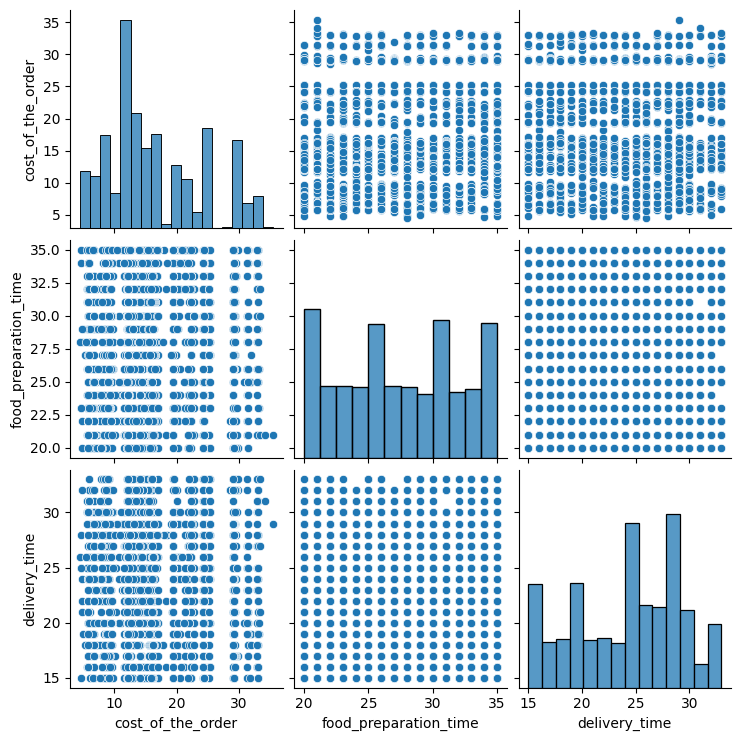

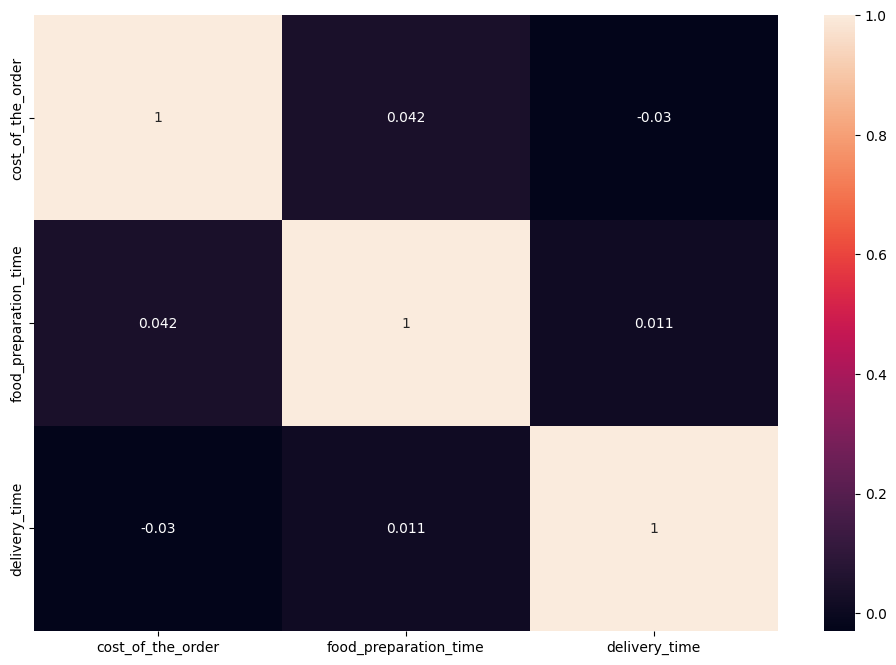

In [207]:
#Pairplot
sns.pairplot(orders, vars=['cost_of_the_order',  'food_preparation_time', 'delivery_time'])

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(orders[ ['cost_of_the_order','food_preparation_time','delivery_time'] ].corr(), annot=True, )

After generating a pairplot between the numerical values food preparation time, delivery time, and cost of the order there is no apparent linear correlation between them. This statement is reinforced once analyzing the heatmap, where we can evidence that the highest relation between any two variables is only 3%

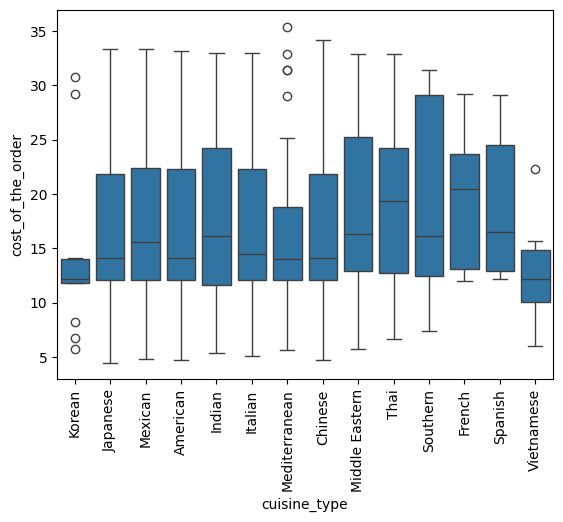

<Axes: xlabel='delivery_time', ylabel='cost_of_the_order'>

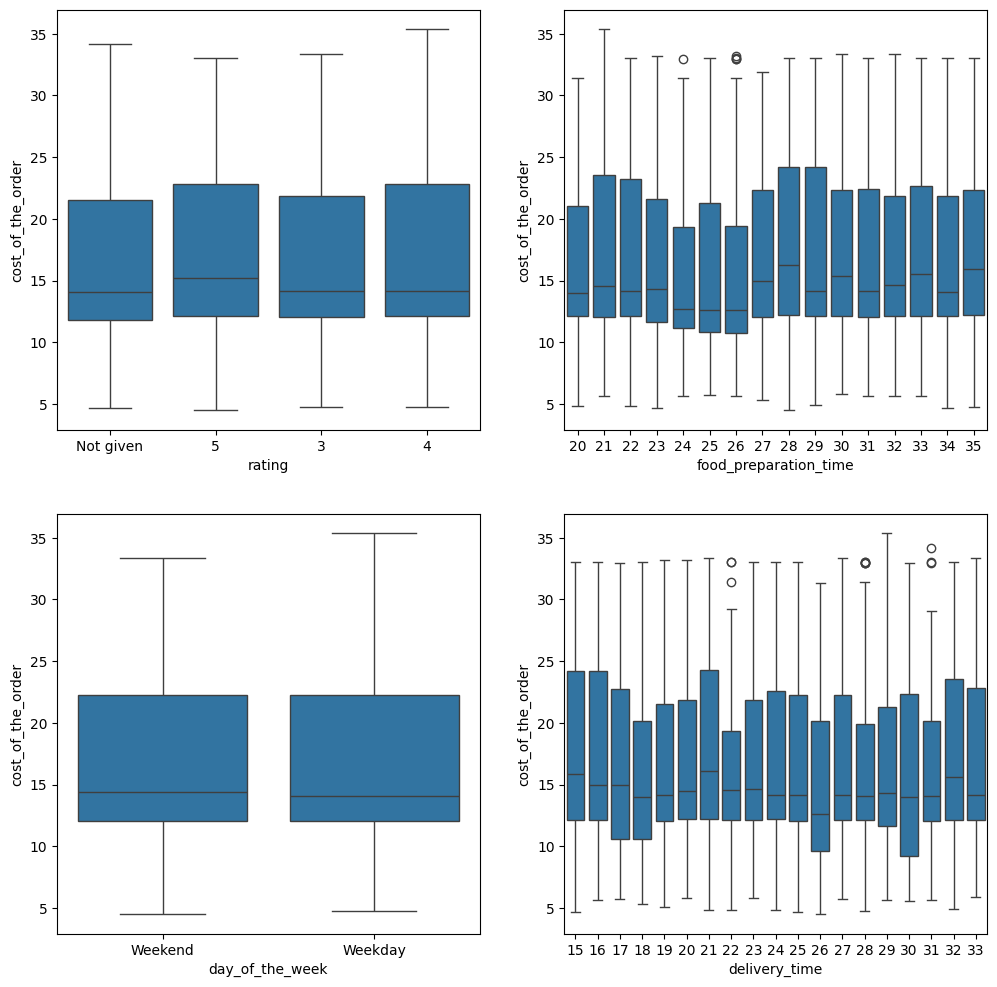

In [208]:

sns.boxplot( data=orders, y=orders['cost_of_the_order'], x=orders['cuisine_type'] )
plt.xticks(rotation=90)
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.boxplot( data=orders, y=orders['cost_of_the_order'], x=orders['rating'], ax=axes[0,0] )
sns.boxplot( data=orders, y=orders['cost_of_the_order'], x=orders['day_of_the_week'], ax=axes[1,0])
sns.boxplot( data=orders, y=orders['cost_of_the_order'], x=orders['food_preparation_time'], ax=axes[0,1] )
sns.boxplot( data=orders, y=orders['cost_of_the_order'], x=orders['delivery_time'], ax=axes[1,1] )


After analyzing the relationship between the cost of the order and several other variables we could state that:
- There is no correlation with the day of the week
- There is no correlation with the delivery time
- There is no correlation with the food preparation time
- There is no correlation with the rating
- There is some relation with the cuisine type. Korean and Vietnamese cuisine types are, in general, cheaper than the other type of cuisines

<Axes: xlabel='delivery_time', ylabel='cuisine_type'>

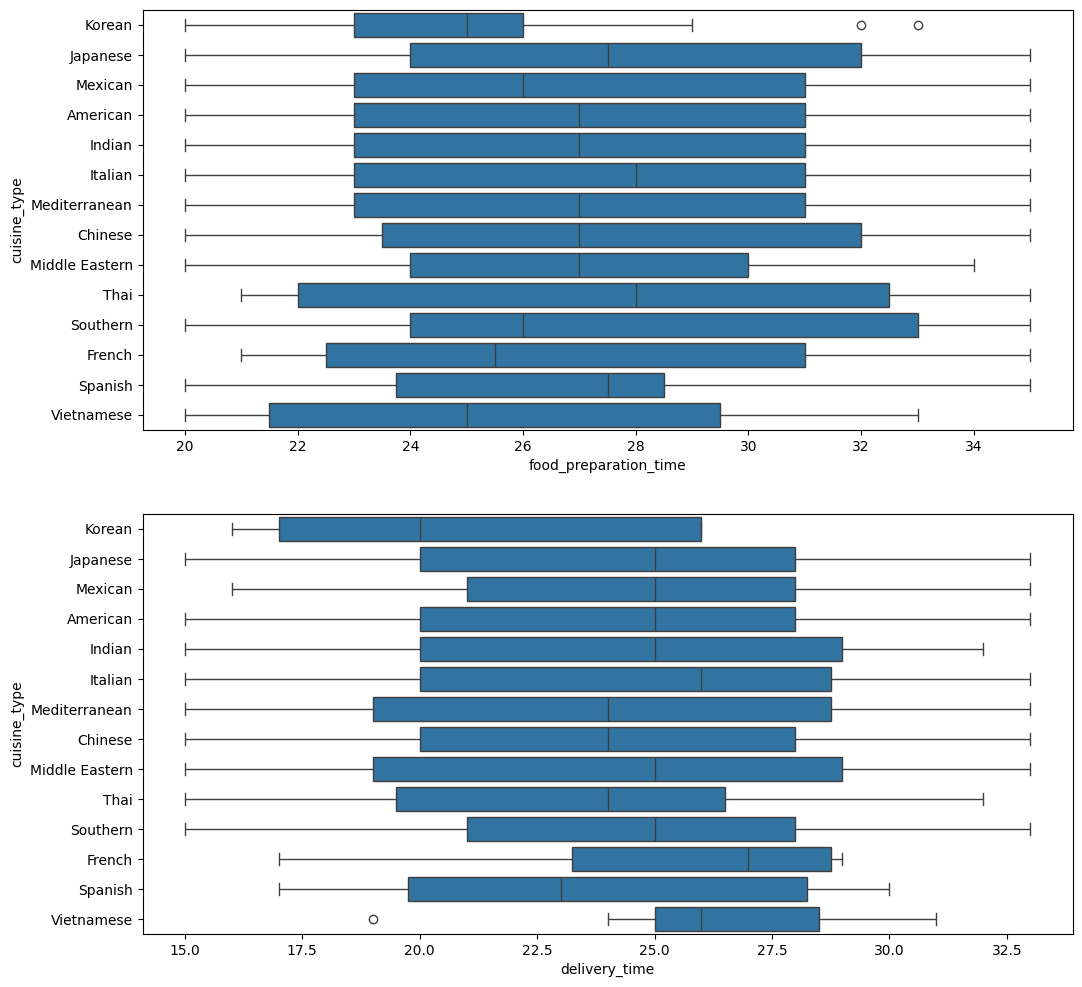

In [209]:
fig, axes = plt.subplots(2, figsize=(12, 12))
sns.boxplot( data=orders, y=orders['cuisine_type'], x=orders['food_preparation_time'], ax=axes[0] )
sns.boxplot( data=orders, y=orders['cuisine_type'], x=orders['delivery_time'], ax=axes[1] )


After analyzing the relationship between the cuisine type and several other variables we could state that:
- There is a little relation with food preparation time, since Korean food might take a little bit less
- There is a little relation with delivery time since Vietnamese food may take a little bit longer to deliver

<Axes: xlabel='food_preparation_time', ylabel='day_of_the_week'>

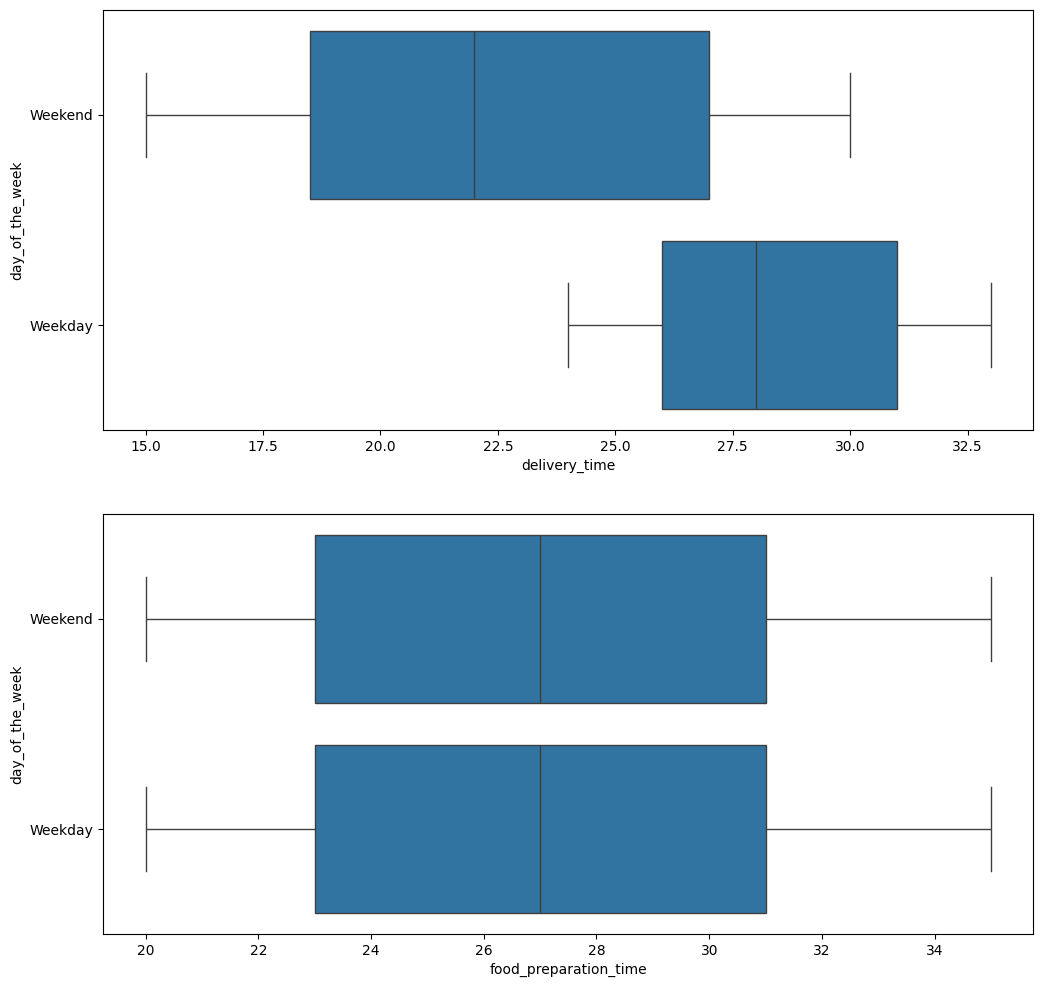

In [210]:
fig, axes = plt.subplots(2, figsize=(12, 12))
sns.boxplot( data=orders, y=orders['day_of_the_week'], x=orders['delivery_time'], ax=axes[0])
sns.boxplot( data=orders, y=orders['day_of_the_week'], x=orders['food_preparation_time'], ax=axes[1] )

After analyzing the relationship between the day of the week and several other variables we could state that:

- There is a relationship with the delivery time, since it takes in average more time to deliver an order during the weekdays than in the weekend.
- There is no relationship with the food preparation time, since it takes the same to prepare

<Axes: xlabel='food_preparation_time', ylabel='delivery_time'>

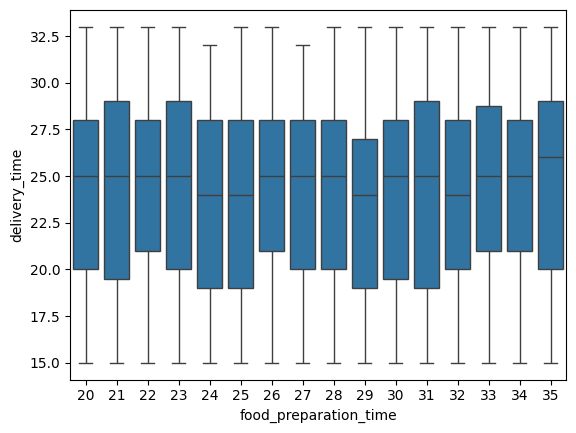

In [211]:
sns.boxplot( data=orders, y=orders['delivery_time'], x=orders['food_preparation_time'] )

After analyzing the food praparation time and the delivery time, we can conclude that there is no relationship between them.

<Axes: xlabel='rating_int', ylabel='cost_of_the_order'>

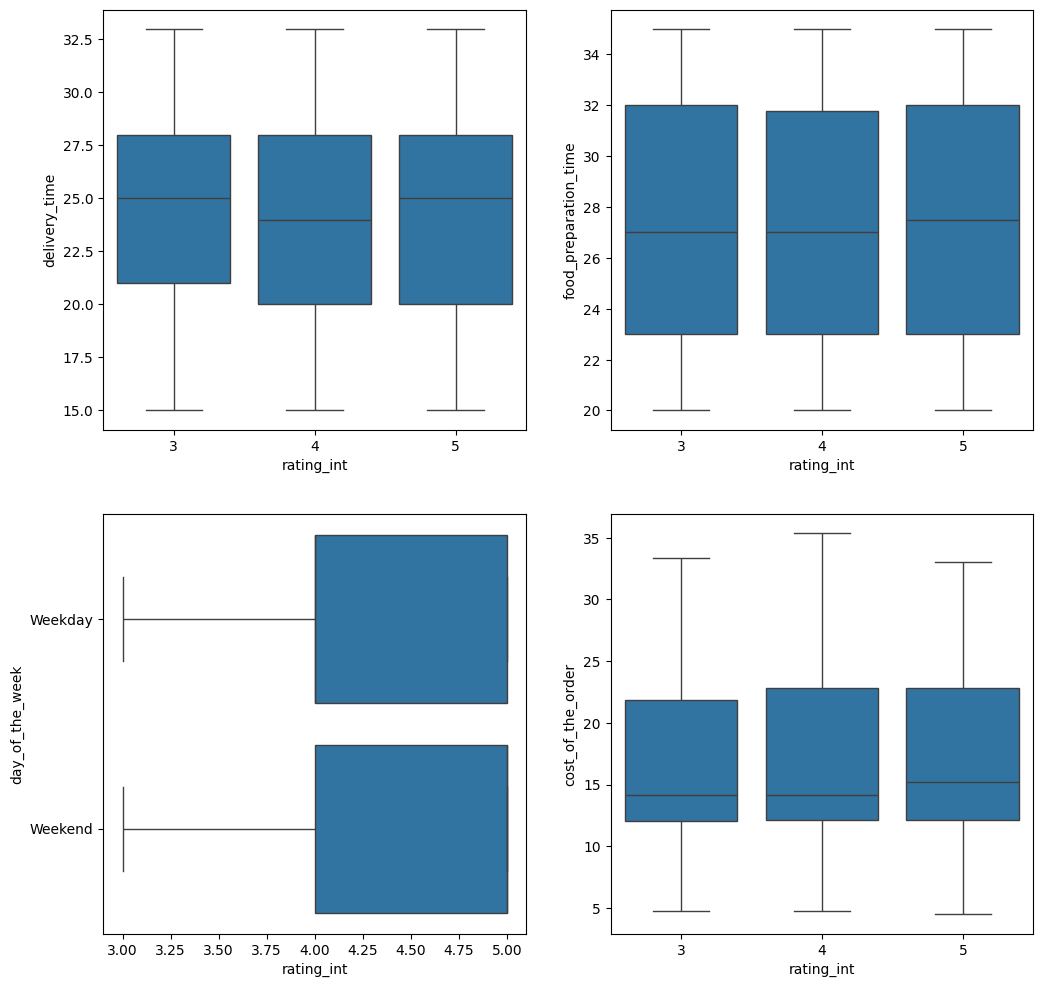

In [212]:
numeric_rating = orders[orders['rating'] != 'Not given'].copy() #remove ratings 'Not given'
numeric_rating['rating_int'] = numeric_rating['rating'].astype(int) #turn rating into numeric values

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot( data=numeric_rating, y=numeric_rating['delivery_time'], x=numeric_rating['rating_int'], ax=axes[0,0])
sns.boxplot( data=numeric_rating, y=numeric_rating['day_of_the_week'], x=numeric_rating['rating_int'], ax=axes[1,0])
sns.boxplot( data=numeric_rating, y=numeric_rating['food_preparation_time'], x=numeric_rating['rating_int'], ax=axes[0,1])
sns.boxplot( data=numeric_rating, y=numeric_rating['cost_of_the_order'], x=numeric_rating['rating_int'], ax=axes[1,1])


After analyzing the rating with other variables we can conclude that there is no apparent relationship with any of the explored variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [213]:
ratings = orders[orders['rating'] != 'Not given'].copy() #removes orders without rating
ratings['rating_int'] = ratings['rating'].astype(int) #creates column with rating as an integer
restaurants_over_50 = ratings['restaurant_name'].value_counts() #counts restaurants
restaurants_over_50 = restaurants_over_50[restaurants_over_50 > 50] #select restaurants with over 50 occurences
restaurants_over_50 = restaurants_over_50.index.tolist() #take the names of the restaurant with over 50 ratings

ratings1 = ratings[ratings['restaurant_name'].isin(restaurants_over_50)].copy() #create a df with the restaurants that have over 50 ratings
ratings1.groupby('restaurant_name').mean() #Group by restaurants using the mean of the data

<ipython-input-213-3d9c9f3d42be>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings1.groupby('restaurant_name').mean() #Group by restaurants using the mean of the data


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_int
restaurant_name,,,,,,
Blue Ribbon Fried Chicken,1.477503e+06,189861.218750,17.665469,26.984375,24.171875,4.328125
Blue Ribbon Sushi,1.477433e+06,163476.506849,16.036438,27.671233,23.260274,4.219178
Shake Shack,1.477568e+06,192110.774436,16.730827,28.090226,24.676692,4.278195
The Meatball Shop,1.477535e+06,162298.166667,17.805357,27.250000,24.904762,4.511905


#### Observations:

There where only 4 restaurants that had over 50 ranked orders. Those where Blue Ribbon Fried Chicken, Blue Ribbon Suchi, Shake Shack, and The Meatball Shop. The average rating these restaurants are 4.32, 4.21, 4.27, and 4.5 respectively.

We can conclude that there are only 4 restaurants with over 50 ratings and havign an average greater than 4:
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [214]:
cost = orders['cost_of_the_order'] #create a list with the order's cost
total_cost = 0 #initiate a variable
above20 = 0
above5 = 0

for item in cost: #for each item in the list do...
  if (item > 20):
    total_cost = total_cost + item*.25 #if the order is over 20 USD, add 25% of the total charge
    above20 = above20 + item*.25
  elif (item > 5):
    total_cost = total_cost + item*.15 #if the item is over 5 USD but under 20 USD, add 15% of the total charge
    above5 = above5 + item*.15
  else: 0

print ("The total revenue is" , round(total_cost,2))
print ('The total revenue from orders over USD 20 is' , round(above20,2) )
print ('The total revenue from orders over USD 5 is' , round(above5,2) )
print(round( above20/total_cost ,2 )*100, "% of the revenue comes from orders above USD 20")

The total revenue is 6166.3
The total revenue from orders over USD 20 is 3688.73
The total revenue from orders over USD 5 is 2477.58
60.0 % of the revenue comes from orders above USD 20


#### Observations:

The net revenue generated by the company across all orders is USD 6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [215]:
orders_time = orders.copy() #create a copy of the original dataset
orders_time["total_time"] = orders_time['food_preparation_time'] + orders_time['delivery_time'] #create a new column finding the total time taken from order placement to order delivery
orders_time['under60'] = orders_time['total_time'] <= 60 #create a column stating if the order was completed in 60 minutes or under
orders_time['under60'].value_counts(normalize=True) #Count the number of orders fulfilled in 60m or under, return a percentage with normalize=True


True     0.894626
False    0.105374
Name: under60, dtype: float64

#### Observations:

We can conlcude that roughly 89.46% of orders are completed in 60 minutes or less

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [216]:
orders.groupby(["day_of_the_week"]).mean() #group the orders by the categories on 'day_of_the_week' and find the average

<ipython-input-216-c7fa4f005b7e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orders.groupby(["day_of_the_week"]).mean() #group the orders by the categories on 'day_of_the_week' and find the average


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
day_of_the_week,,,,,
Weekday,1.477483e+06,173010.771481,16.311188,27.212066,28.340037
Weekend,1.477500e+06,170422.561066,16.574833,27.436714,22.470022


#### Observations:

We can conclude that the average time taken to fulfill an order in the Weekday is 28.34m and 22.47m in the Weekend. The time in the to deliver an order in the Weekend is about 6 minutes less

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- There where a total of 1898 orders, ditributed on 1200 clients. However, 784 clients ordered only once.
- The average food preparation time is 27 minutes, and the average delivery time is about 24 minutes. Roughly 90% of the orders are delivered in 60 minutes or under once the order is placed
- The average cost of an order is about USD 12.50
- 3 restaurants represent about 25% of all orders, with a total of 178 restaurants
- 3 cuisine types represent about 75% of all orders, with a total of 14. However, American cuisine takes about 30.8% of all orders
- 70% of orders happen on the Weekend
- The delivery time on the weekend takes about 6 minutes less than on the weekdays
- All restaurants with over 50 ratings have over 4 rating points on average
- 60% of the revenue comes from orders over USD 20, and only 30% of all orders cost over USD 5 and below USD 20
- 38% of orders are unranked (most). However, 5, 4, and 3, star reviews take up the following slots accordingly. This shows most of their clients are satisfied with the service provided.
- There is no apparent relationship between the rating and any other variable

### Recommendations:


1. Foodhub is assuming a huge risk by having 25% of their demand represented in only 3 restaurants (1.6%). They should try to promote other restaurants to balance their restaurant-associated risk
2. Foodhub has a balanced client porfolio, since several clients create few orders (unlike what happens in their restaurant portfolio). However, on average each customer created 1.5 orders. Foodhub should try to increase the amount of orders made by each cliente; they should increase the number of repeating clients since 65% only ordered once.
3. Foodhub should keep an eye on cuisine type and diversify if needed. Understanding that having 30.8% of orders from American cuisine should be normal given their location.
4. Given that on the weekends 70% of orders are placed and the delivery time is faster, Foodhub could take advantage of this and charge some extra, if in need to increase revenue

---